<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [14]:
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [9]:
df1 = pd.read_csv(file_name)
import matplotlib.pyplot as plt

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


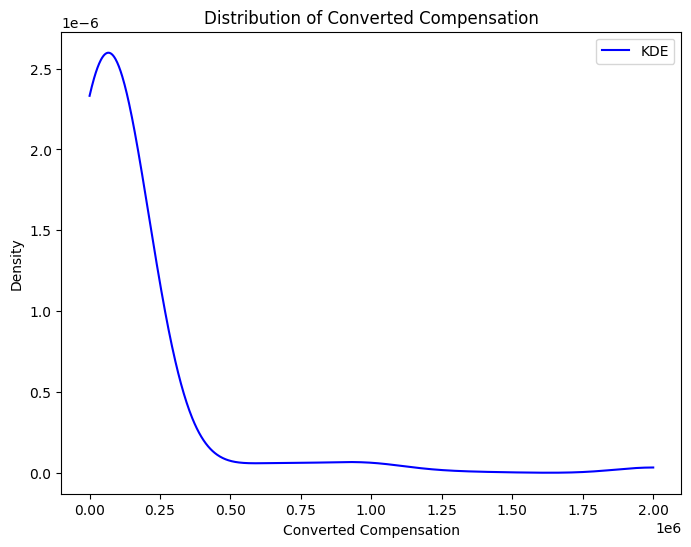

In [15]:
# your code goes here
df2 = df1.drop_duplicates()
df = df2.dropna()
kde = gaussian_kde(df['ConvertedComp'], bw_method=0.5) 
x = np.linspace(df['ConvertedComp'].min(), df['ConvertedComp'].max(), 1000)
kde_values = kde(x)
plt.figure(figsize=(8, 6)) 
plt.plot(x, kde_values, color='blue', label='KDE')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.legend()
plt.show()

Plot the histogram for the column `ConvertedComp`.


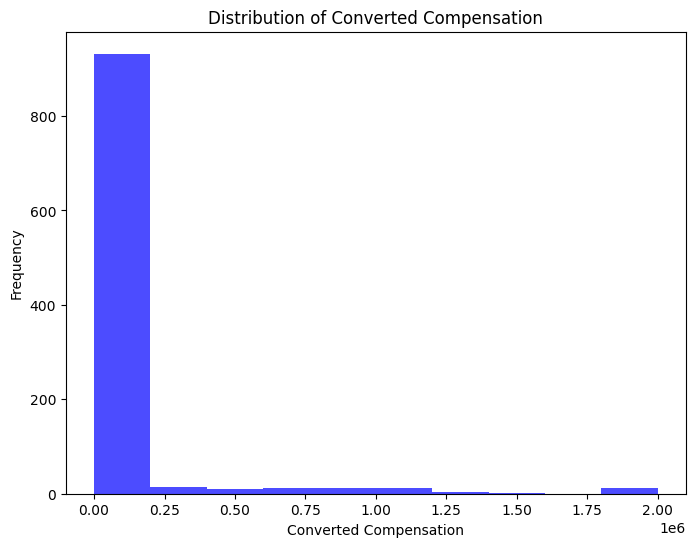

In [17]:
# your code goes here
plt.figure(figsize=(8, 6)) 
plt.hist(df['ConvertedComp'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [18]:
# your code goes here
Median = df['ConvertedComp'].median()
print(Median)

65537.5


How many responders identified themselves only as a **Man**?


In [20]:
# your code goes here
Gender = df['Gender'].value_counts()
Men = Gender.get("Man",0)
print(Men)

962


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
# your code goes here
woman_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(woman_comp)

60000.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [25]:
# your code goes here
five_num_summary = df['Age'].describe(percentiles=[.25, .5, .75])
print(five_num_summary)

count    1008.000000
mean       30.627976
std         6.640693
min        19.000000
25%        26.000000
50%        29.000000
75%        34.000000
max        63.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


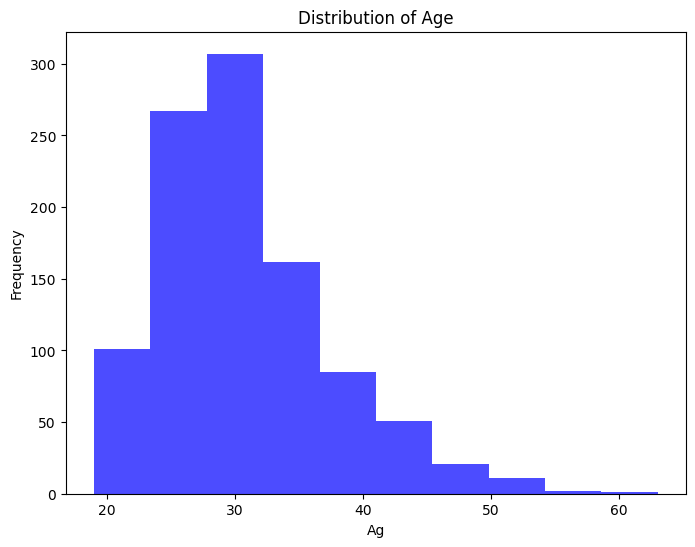

In [26]:
# your code goes here
plt.figure(figsize=(8, 6)) 
plt.hist(df['Age'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Ag')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


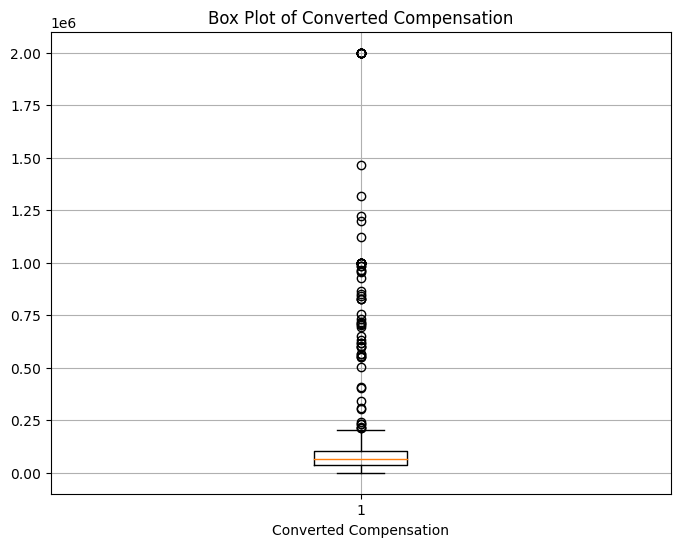

In [27]:
# your code goes here
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'])  # vert=False to plot horizontally
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [28]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

70842.5


Find out the upper and lower bounds.


In [29]:
# your code goes here
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
print(upper)
print(lower)

211511.25
-71858.75


Identify how many outliers are there in the `ConvertedComp` column.


In [30]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)]
num_outliers = outliers.shape[0]
print(num_outliers)

71


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [32]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower) & (df['ConvertedComp'] <= upper)]
print(df_no_outliers)

       Respondent                                         MainBranch Hobbyist  \
6              20  I am not primarily a developer, but I write co...       No   
15             39                     I am a developer by profession      Yes   
17             44                     I am a developer by profession      Yes   
36             83                     I am a developer by profession      Yes   
47            104                     I am a developer by profession      Yes   
...           ...                                                ...      ...   
11320       24975                     I am a developer by profession      Yes   
11321       24977                     I am a developer by profession      Yes   
11324       24985                     I am a developer by profession      Yes   
11345       25022  I am not primarily a developer, but I write co...      Yes   
11384       25118                     I am a developer by profession      Yes   

                           

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [34]:
# your code goes here
correlation = df.corr(numeric_only=True)['Age']
print(correlation)

Respondent       0.027928
CompTotal        0.012503
ConvertedComp    0.109655
WorkWeekHrs      0.040690
CodeRevHrs      -0.007431
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
